<a href="https://colab.research.google.com/github/aschoudry/ML_imageClassifier/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [2]:
tf.__version__

'2.6.0'

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


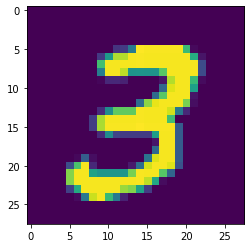

In [4]:
fig, ax = plt.subplots()
im = ax.imshow(x_train[7])

plt.show()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [7]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)


In [8]:
y_test = to_categorical(y_test)

In [9]:
y_train.shape

(60000, 10)

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer="Adam",
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.Accuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [13]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=50, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 10s 4ms/step - loss: 9.8550 - accuracy: 0.8671 - false_negatives: 9730.0000 - val_loss: 5.9111 - val_accuracy: 0.8862 - val_false_negatives: 1128.0000
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 6.0219 - accuracy: 0.8758 - false_negatives: 7293.0000 - val_loss: 5.4200 - val_accuracy: 0.8813 - val_false_negatives: 1101.0000
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 5.7284 - accuracy: 0.8747 - false_negatives: 6988.0000 - val_loss: 6.3618 - val_accuracy: 0.8939 - val_false_negatives: 1187.0000
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 5.5349 - accuracy: 0.8754 - false_negatives: 6902.0000 - val_loss: 5.3771 - val_accuracy: 0.8865 - val_false_negatives: 1042.0000
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 5.3516 - accuracy: 0.8744 - false_negatives: 6822.0000 - val_loss: 6.4854 - val_accuracy: 0.8827 - 

In [14]:
x_train.shape

(60000, 784)

In [21]:
y_predict  = model.predict(x_test)

In [23]:
y_predict[2]

array([0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 3.5091181e-35,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       4.7083056e-22, 0.0000000e+00], dtype=float32)

In [20]:
x_test[6].shape

(784,)